# Code for the Project

## Importing and data cleaning

In [84]:
import pandas as pd
columns = ["annual_inc", "delinq_2yrs", "dti", "emp_length",
           "grade", "home_ownership", "installment", "int_rate", 
           "loan_amnt", "loan_status", "num_accts_ever_120_pd", 
           "purpose", "term", "total_acc", "total_pymnt", 
           "last_fico_range_high", "last_fico_range_low"]

data = pd.read_csv("accepted_2007_to_2018Q4.csv", usecols=columns)
data.shape

(2260701, 17)

In [3]:
print(data.value_counts("loan_status"), "\n")
non_default = ["Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]
default = ["Late (31-120 days)", "Late (16-30 days)", "Default",
           "Charged Off", "Does not meet the credit policy. Status:Charged Off"]

data = data[~data.loan_status.isin(["Current", "In Grace Period"])]
data["loan_status"].replace(non_default, 0, inplace=True)
data["loan_status"].replace(default, 1, inplace=True)
print(data.value_counts("loan_status"))

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
dtype: int64 

loan_status
0.0    1078739
1.0     295176
dtype: int64


In [4]:
data['term'] = data['term'].str.split(' ').str.get(1)
data['term'] = data['term'].astype('float')
data['int_rate'] = pd.to_numeric(data['int_rate'])
data['loan_status']=data['loan_status'].astype('category')
data['emp_length'] = data['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype('float')
data['emp_length']
data.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,delinq_2yrs,total_acc,total_pymnt,last_fico_range_high,last_fico_range_low,num_accts_ever_120_pd
0,3600.0,36.0,13.99,123.03,C,11.0,MORTGAGE,55000.0,0.0,debt_consolidation,5.91,0.0,13.0,4421.723917,564.0,560.0,2.0
1,24700.0,36.0,11.99,820.28,C,11.0,MORTGAGE,65000.0,0.0,small_business,16.06,1.0,38.0,25679.660000,699.0,695.0,0.0
2,20000.0,60.0,10.78,432.66,B,11.0,MORTGAGE,63000.0,0.0,home_improvement,10.78,0.0,18.0,22705.924294,704.0,700.0,0.0
4,10400.0,60.0,22.45,289.91,F,3.0,MORTGAGE,104433.0,0.0,major_purchase,25.37,1.0,35.0,11740.500000,704.0,700.0,0.0
5,11950.0,36.0,13.44,405.18,C,4.0,RENT,34000.0,0.0,debt_consolidation,10.20,0.0,6.0,13708.948530,759.0,755.0,0.0


In [5]:
print(data.shape)
print(data.isna().sum())
data2 = data.dropna()
data2.shape

(1373948, 17)
loan_amnt                   33
term                        33
int_rate                    33
installment                 33
grade                       33
emp_length               80883
home_ownership              33
annual_inc                  37
loan_status                 33
purpose                     33
dti                        436
delinq_2yrs                 62
total_acc                   62
total_pymnt                 33
last_fico_range_high        33
last_fico_range_low         33
num_accts_ever_120_pd    70309
dtype: int64


(1224832, 17)

In [6]:
data2["fico_range_avg"] = (data2["last_fico_range_high"]+data2["last_fico_range_low"]) / 2
data2 = data2.drop(["last_fico_range_high", "last_fico_range_low"],axis=1)
data2.shape

<ipython-input-6-33c25b35de42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["fico_range_avg"] = (data2["last_fico_range_high"]+data2["last_fico_range_low"]) / 2


(1224832, 16)

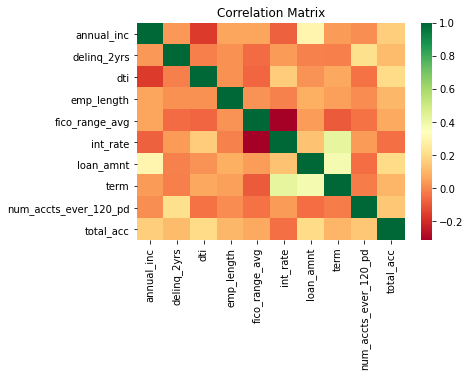

In [89]:
# Correlation Table
quant_columns = ["annual_inc", "delinq_2yrs", "dti", "emp_length", 
                 "fico_range_avg", "int_rate", "loan_amnt", "term",
                 "num_accts_ever_120_pd", "total_acc"]
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data2[quant_columns].corr(), cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()
# plt.savefig("Correlation_matrix.pdf",)

In [48]:
categorical = ["grade", "home_ownership", "purpose"]
data3 = pd.get_dummies(
    data2, columns=categorical, prefix="", prefix_sep="", drop_first=True)

## Creating train-test split (balanced)

In [9]:
# default_rows = data3[data3["loan_status"] == 1]
# non_default_rows = data3[data3["loan_status"] == 0]
# print("Total non-default:", non_default_rows.shape)
# print("Total default:", default_rows.shape)
# train_size = int(default_rows.shape[0] * 0.8)
# non_default_train = non_default_rows.sample(n=train_size, random_state=123)
# default_train = default_rows.sample(n=train_size, random_state=234)
# print("Non-default vs default train:", non_default_train.shape[0], default_train.shape[0])
# non_default_test = non_default_rows[~non_default_rows.index.isin(non_default_train.index)]
# default_test = default_rows[~default_rows.index.isin(default_train.index)]
# print("Non-default vs default test:", non_default_test.shape[0], default_test.shape[0])

# merged_train = pd.concat([non_default_train, default_train], axis=0)
# print("Full train:", merged_train.shape[0])
# merged_test = pd.concat([non_default_test, default_test], axis=0)
# print("Full test:", merged_test.shape[0])

In [10]:
# # Scaling variables
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(merged_train[quant_columns])
# merged_train[quant_columns] = scaler.transform(merged_train[quant_columns])
# merged_test[quant_columns] = scaler.transform(merged_test[quant_columns])

In [11]:
# y_train = merged_train["loan_status"]
# X_train = merged_train.loc[:, ~merged_train.columns.isin(["loan_status", "total_pymnt", "installment"])]
# print("Train data:", y_train.shape, X_train.shape)
# y_test = merged_test["loan_status"]
# X_test = merged_test.loc[:, ~merged_test.columns.isin(["loan_status", "total_pymnt", "installment"])]
# print("Test data:", y_test.shape, X_test.shape, merged_train.shape)

In [12]:
# XGB Classifier Tuning
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
# from sklearn.model_selection import RandomizedSearchCV

# xgb_cl = xgb.XGBClassifier(random_state=456, n_jobs=-1)
# params_xgb_cl ={'n_estimators': [100, 200, 300, 400, 500, 1000, 1500, 2000],
#                 'max_depth': [1, 3, 5, 7, 9],
#                 'learning_rate': [0.01, 0.05, 0.1, 0.15],
#                 'colsample_bytree': [0.1, 0.5, 0.7, 1],
#                 'subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
#                 'alpha': [0, 0.01, 0.05, 0.1],
#                 'lambda': [0.05, 1, 1.5]}
# grid_xgb_cl = RandomizedSearchCV(estimator=xgb_cl, param_distributions=params_xgb_cl, cv=3,
#                                  scoring='recall', verbose=1, n_jobs=-1, n_iter=100)
# grid_xgb_cl.fit(X_train_cl, y_train_cl)
# best_hyperparams = grid_xgb_cl.best_params_
# print('Best Classification HyperParams:\n', best_hyperparams)

In [13]:
# xgb_cl = xgb.XGBClassifier(subsample=0.7, n_estimators=200, max_depth=7,
#                            learning_rate=0.01, reg_lambda=1.5, colsample_bytree=0.7, 
#                            alpha=0.01, random_state=50, scale_pos_weight=0.8)
# xgb_cl.fit(X_train, y_train)

In [14]:
# y_train_pred = xgb_cl.predict(X_train)
# print(classification_report(y_train, y_train_pred))
# y_test_pred = xgb_cl.predict(X_test)
# print(classification_report(y_test, y_test_pred))
# disp = plot_confusion_matrix(xgb_cl, X_test, y_test,
#                              display_labels=[0, 1],
#                              cmap=plt.cm.Blues,
#                              normalize="true")
# disp.ax_.set_title("Confusion Matrix")
# plt.show()

## Creating train-test split (unbalanced)

In [49]:
y_full = data3["loan_status"]
X_full = data3.loc[:, ~data3.columns.isin(["loan_status", "total_pymnt", "installment"])]
print(y_full.shape, X_full.shape, data3.shape)
X_full.columns

(1224832,) (1224832, 34) (1224832, 37)


Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'total_acc', 'num_accts_ever_120_pd', 'fico_range_avg',
       'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'NONE', 'OTHER', 'OWN',
       'RENT', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_full, y_full, test_size=0.20, random_state=123, stratify=y_full)
print(X_train1.shape, y_train1.shape)
print(X_test1.shape, y_test1.shape)

(979865, 34) (979865,)
(244967, 34) (244967,)


In [68]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10, svd_solver='full', random_state=11)
pca.fit(X_train1)
X_train_new = pca.transform(X_train1)
print("X_train after PCA", X_train_new.shape)
X_test_new = pca.transform(X_test1)
print("X_test after PCA", X_test_new.shape)
sum(pca.explained_variance_ratio_)

X_train after PCA (979865, 10)
X_test after PCA (244967, 10)


0.9999999996753346

In [52]:
xgb_cl_1 = xgb.XGBClassifier(subsample=0.7, n_estimators=500, max_depth=9,
                             learning_rate=0.01, reg_lambda=1.5, colsample_bytree=0.7, 
                             alpha=0.01, random_state=123, scale_pos_weight=3.65)
xgb_cl_1.fit(X_train_new, y_train1)

XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0.00999999978, reg_lambda=1.5, scale_pos_weight=3.65,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [53]:
y_pred_train1 = xgb_cl_1.predict(X_train_new)
print(classification_report(y_train1, y_pred_train1))
y_pred_test1 = xgb_cl_1.predict(X_test_new)
print(classification_report(y_test1, y_pred_test1))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92    770990
         1.0       0.67      0.91      0.77    208875

    accuracy                           0.89    979865
   macro avg       0.82      0.90      0.85    979865
weighted avg       0.91      0.89      0.89    979865

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92    192748
         1.0       0.67      0.91      0.77     52219

    accuracy                           0.88    244967
   macro avg       0.82      0.89      0.85    244967
weighted avg       0.91      0.88      0.89    244967



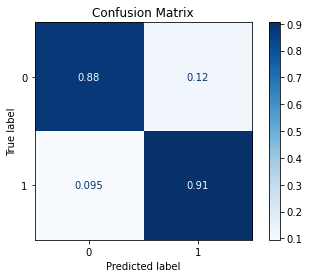

In [54]:
# proportional values
disp = plot_confusion_matrix(xgb_cl_1, X_test_new, y_test1,
                             display_labels=[0, 1],
                             cmap=plt.cm.Blues,
                             normalize="true")
disp.ax_.set_title("Confusion Matrix")
plt.show()

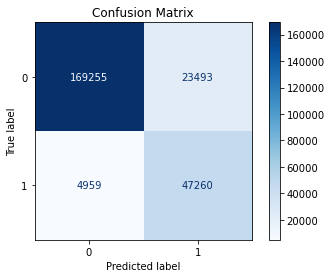

In [55]:
# absolute values
disp = plot_confusion_matrix(xgb_cl_1, X_test_new, y_test1,
                             display_labels=[0, 1],
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()